# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [23]:
df = app_train.corr()['AMT_INCOME_TOTAL'].reset_index()
df

,index,AMT_INCOME_TOTAL
0,SK_ID_CURR,-0.001820
1,TARGET,-0.003982
2,NAME_CONTRACT_TYPE,-0.003531
3,FLAG_OWN_CAR,0.083383
4,FLAG_OWN_REALTY,0.002934
5,CNT_CHILDREN,0.012882
6,AMT_INCOME_TOTAL,1.000000
7,AMT_CREDIT,0.156870
8,AMT_ANNUITY,0.191657
9,AMT_GOODS_PRICE,0.159610


In [24]:
print(df.sort_values(by="AMT_INCOME_TOTAL", ascending = False).head(15))
print(df.sort_values(by="AMT_INCOME_TOTAL", ascending = True).head(15))

                         index  AMT_INCOME_TOTAL
6             AMT_INCOME_TOTAL          1.000000
8                  AMT_ANNUITY          0.191657
9              AMT_GOODS_PRICE          0.159610
7                   AMT_CREDIT          0.156870
43               FLOORSMIN_AVG          0.139860
71              FLOORSMIN_MEDI          0.138489
57              FLOORSMIN_MODE          0.131800
45        LIVINGAPARTMENTS_AVG          0.106920
73       LIVINGAPARTMENTS_MEDI          0.104914
59       LIVINGAPARTMENTS_MODE          0.092991
39              COMMONAREA_AVG          0.089616
67             COMMONAREA_MEDI          0.087918
3                 FLAG_OWN_CAR          0.083383
53             COMMONAREA_MODE          0.075625
10  REGION_POPULATION_RELATIVE          0.074796
                           index  AMT_INCOME_TOTAL
15                   OWN_CAR_AGE         -0.117273
24   REGION_RATING_CLIENT_W_CITY         -0.091735
23          REGION_RATING_CLIENT         -0.085465
109         

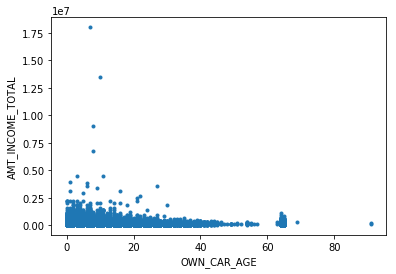

In [27]:
plt.plot(app_train['OWN_CAR_AGE'] , app_train['AMT_INCOME_TOTAL'] , '.')
plt.xlabel('OWN_CAR_AGE')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()

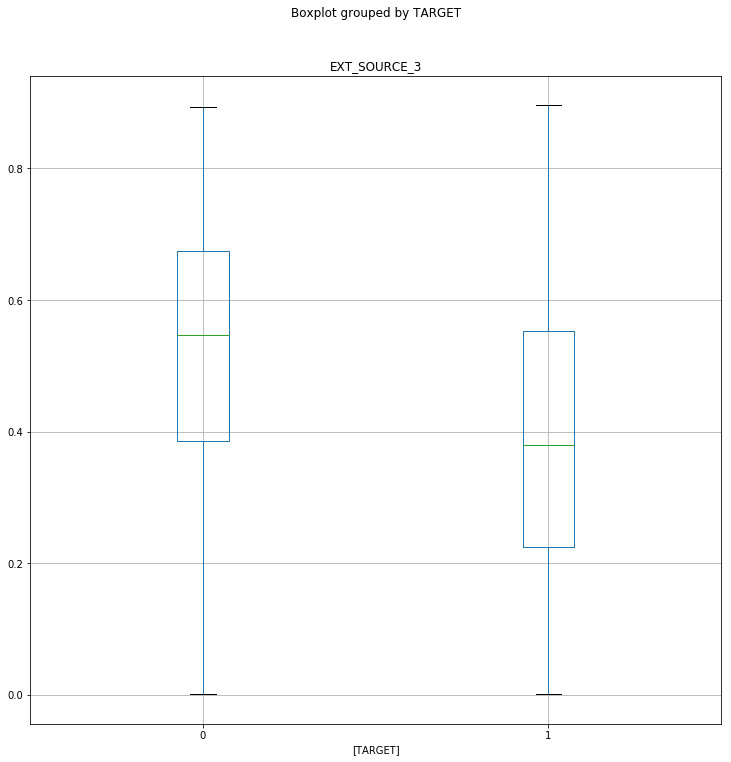

In [22]:
app_train.boxplot(column='EXT_SOURCE_3', by = ['TARGET'], showfliers = False, figsize=(12,12))

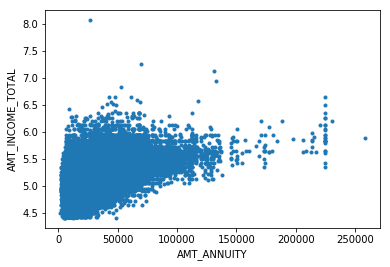

In [29]:
plt.plot(app_train['AMT_ANNUITY'] , np.log10(app_train['AMT_INCOME_TOTAL']) , '.')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()

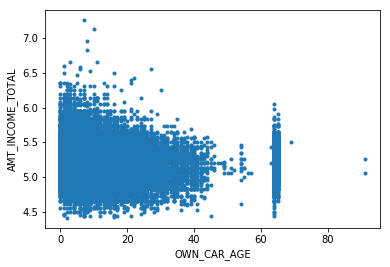

In [30]:
plt.plot(app_train['OWN_CAR_AGE'] , np.log10(app_train['AMT_INCOME_TOTAL']) , '.')
plt.xlabel('OWN_CAR_AGE')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()